In [14]:
from gluoncv.data import COCOInstance

# typically we use train2017 (i.e. train2014 + minival35k) split as training data
# COCO dataset actually has images without any objects annotated,
# which must be skipped during training to prevent empty labels
train_dataset = COCOInstance(splits='instances_train2017', skip_empty=True)
# and val2014 (i.e. minival5k) test as validation data
val_dataset = COCOInstance(splits='instances_val2017', skip_empty=False)

print('Training images:', len(train_dataset))
print('Validation images:', len(val_dataset))

OSError: ~/.mxnet/datasets/coco is not a valid dir. Did you forget to initialize                          datasets described in:                          `https://cv.gluon.ai/build/examples_datasets/index.html`?                          You need to initialize each dataset only once.

In [3]:
train_image, train_label, train_segm = train_dataset[6]
bboxes = train_label[:, :4]
cids = train_label[:, 4:5]
print('image:', train_image.shape)
print('bboxes:', bboxes.shape, 'class ids:', cids.shape)
# segm is a list of polygons which are arrays of points on the object boundary
print('masks', [[poly.shape for poly in polys] for polys in train_segm])

NameError: name 'train_dataset' is not defined

AttributeError: gluoncv.utils.viz module requires mxnet which is missing.

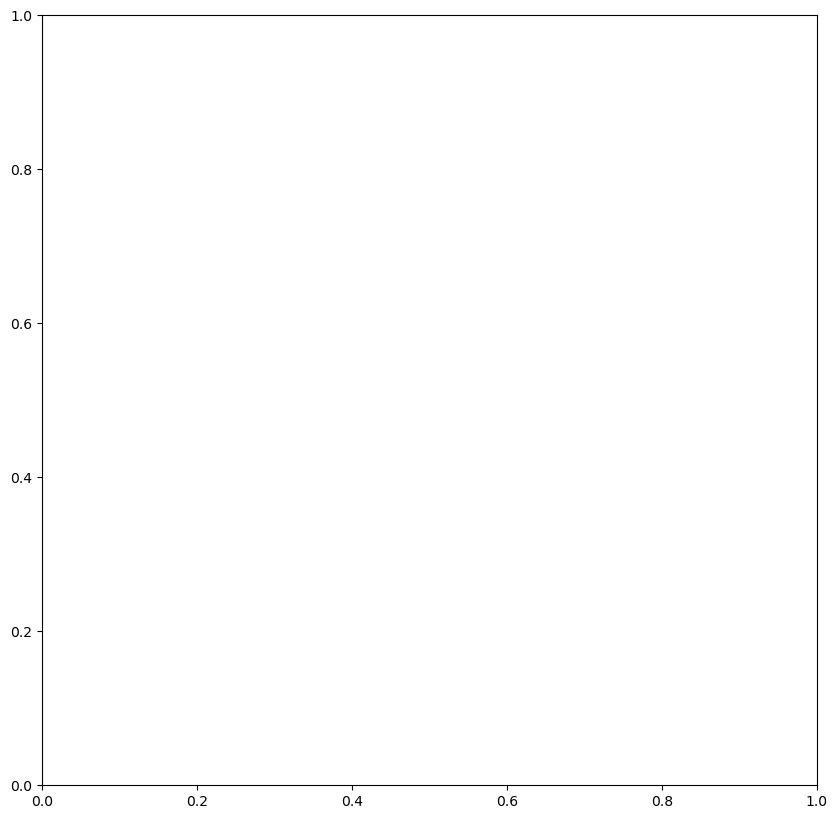

In [4]:
from matplotlib import pyplot as plt
from gluoncv.utils import viz

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = viz.plot_bbox(train_image, bboxes, labels=cids, class_names=train_dataset.classes, ax=ax)
plt.show()

In [5]:
import numpy as np
from gluoncv.data.transforms import mask as tmask

width, height = train_image.shape[1], train_image.shape[0]
train_masks = np.stack([tmask.to_mask(polys, (width, height)) for polys in train_segm])
plt_image = viz.plot_mask(train_image, train_masks)

ModuleNotFoundError: No module named 'mxnet'

AttributeError: gluoncv.utils.viz module requires mxnet which is missing.

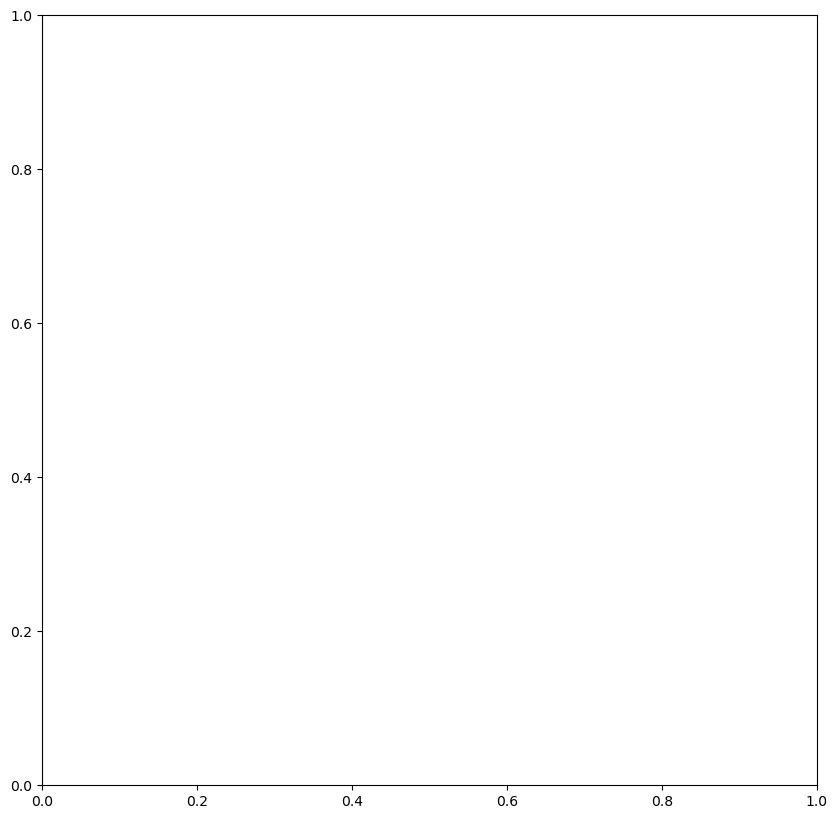

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = viz.plot_bbox(plt_image, bboxes, labels=cids, class_names=train_dataset.classes, ax=ax)
plt.show()

In [7]:
from gluoncv.data.transforms import presets
from gluoncv import utils
from mxnet import nd


ModuleNotFoundError: No module named 'mxnet'

In [8]:
short, max_size = 600, 1000  # resize image to short side 600 px, but keep maximum length within 1000
train_transform = presets.rcnn.MaskRCNNDefaultTrainTransform(short, max_size)
val_transform = presets.rcnn.MaskRCNNDefaultValTransform(short, max_size)


NameError: name 'presets' is not defined

In [9]:
utils.random.seed(233)  # fix seed in this tutorial

NameError: name 'utils' is not defined

In [10]:
train_image2, train_label2, train_masks2 = train_transform(train_image, train_label, train_segm)
print('tensor shape:', train_image2.shape)
print('box and id shape:', train_label2.shape)
print('mask shape', train_masks2.shape)

NameError: name 'train_transform' is not defined

In [11]:
plt_image2 = train_image2.transpose((1, 2, 0)) * nd.array((0.229, 0.224, 0.225)) + nd.array(
    (0.485, 0.456, 0.406))
plt_image2 = (plt_image2 * 255).asnumpy().astype('uint8')


NameError: name 'train_image2' is not defined

In [12]:
width, height = plt_image2.shape[1], plt_image2.shape[0]
plt_image2 = viz.plot_mask(plt_image2, train_masks2)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = viz.plot_bbox(plt_image2, train_label2[:, :4],
                   labels=train_label2[:, 4:5],
                   class_names=train_dataset.classes,
                   ax=ax)
plt.show()

NameError: name 'plt_image2' is not defined

In [13]:
from gluoncv.data.batchify import Tuple, Append, MaskRCNNTrainBatchify
from mxnet.gluon.data import DataLoader

batch_size = 2  # for tutorial, we use smaller batch-size
num_workers = 0  # you can make it larger(if your CPU has more cores) to accelerate data loading

train_bfn = Tuple(*[Append() for _ in range(3)])
train_loader = DataLoader(train_dataset.transform(train_transform), batch_size, shuffle=True,
                          batchify_fn=train_bfn, last_batch='rollover', num_workers=num_workers)
val_bfn = Tuple(*[Append() for _ in range(2)])
val_loader = DataLoader(val_dataset.transform(val_transform), batch_size, shuffle=False,
                        batchify_fn=val_bfn, last_batch='keep', num_workers=num_workers)

for ib, batch in enumerate(train_loader):
    if ib > 3:
        break
    print('data 0:', batch[0][0].shape, 'label 0:', batch[1][0].shape, 'mask 0:', batch[2][0].shape)
    print('data 1:', batch[0][1].shape, 'label 1:', batch[1][1].shape, 'mask 1:', batch[2][1].shape)

NameError: name 'train_dataset' is not defined